### HTTP 프로토콜
- 웹 브라우저와 웹 서버 사이의 데이터 통신 규칙
- 프로토콜은 소프트웨어이다.
- 동작 과정
    - 웹 브라우저는 HTTP 요청 형식에 따라 웹 서버에 데이터를 보낸다.
    - 웹 서버는 웹 브라우저가 보낸 데이터를 분석하고 요청받은 일을 처리하여 HTTP 응답형식에 따라 응답한다.
- http는 일회성 연결(비 연결 요청) 이라서 한번 요청(request)하고 한번 응답(response)하면 바로 연결이 종료됨(Connection: close)
    
    
### HTTP 요청 형식
01 **GET /somedir/resource.format HTTP /1.1**<br> 
02 Host:www.naver.com<br>
03 Cache-Control:max-age=0<br>
04 Accept:text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9
<br>
05 **User-Agent**:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36<br>
06 Accept-Endocing: gzip, deflate, br<br>
07 Accept-language: ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7<br>
08


> #### 요청라인 (01)
- 메소드, 요청 자원(요청 URI), 프로토콜 버전으로 구성
- **메소드**: 요청자원에 대해 웹 서버에게 내리는 명령
- **요청 URI**: 요청하는 자원의 식별자(경로)
- **프로토콜 버전**: 요청 정보가 어떤 버전에 맞추어 작성됐는지 웹 서버에게 알려주는 것.

> #### 요청 헤더 (02 ~ 07)
- 서버가 요청을 처리할 때 참고하라고 클라이언트에서 웹 서버에게 알려주는 정보.
- 형식: **헤더 이름: 헤더 값**
- 헤더 종류
    - 일반 헤더(General-header)는 요청, 응답 모두에 적용할 수 있음.
    - 요청 헤더(Request-header)는 요청 헤더에 적용할 수 있음.
    - 응답 헤더(Response-header)는 응답 헤더에 적용할 수 있음
    - 엔티티 헤더(Entity-header)는 보내거나 받는 본문 데이터를 설명하는 헤더


> #### 공백 라인과 요청 데이터 (08)
- 헤더의 끝을 나타낸다.
- 공백 라인 다음에는 서버에 보낼 데이터(Message-Body)rk dhsek.


### HTTP 응답 형식
01 **HTTP/1.1 200 OK** <br>
02 Date: Fri, 18 Sep 2020 00:50:23 GMT<br>
03 X-UA-Compatible: IE=10<br>
04 Expires: Sat, 01, Jan, 1970 22:00:00 GMT<br>
05 pragma: no-cache<br>
06 cache-control: no-cache, no-store, must-revalidate<br>
07 p3p: CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"<br>
08 content-type: text/html; charset=UTF-8<br>
09 Content-Language: ko-KR<br>
10 Vary: Accept-Encoding<br>
11 Content-Encoding: gzip<br>
12 X-UA-Device-Type: pc<br>
13 Content-Length: 34770<br>
14 Connection: close<br>
15<br>
16 <!DOCTYPE html><br>
17 <html lang="ko"><br>
18 ... 생략<br>
    
> #### 상태라인(Status-Line) (01)
- 프로토콜 버전, 상태 코드, 상태 설명으로 구성
    - HTTP/1.1 : HTTP 버전
    - 200 : 상태 코드
    - OK : 상태 설명
    - **상태코드**
        - 200: 요청이 성공적으로 처리
        - 301: 요청한 자원이 이동되었으니 헤더 정보에 이동 위치를 알려줌
        - 304: 클라이언트가 임시 보관한 응답 결과와 다르지 않다
        - 400: 잘못된 요청
        - 404: 요청한 자원을 찾을 수 없다.
        - 500: 서버 내부에서 오류 발생
    
> #### 응답헤더 (02 ~ 14)
- 응답 데이터를 처리할 때 참고하라고 웹 브라우저에게 알려주는 저옵


## TCP 소켓으로 HTTP 구현하기

In [1]:
import socket

#### 주소체계
___
AF_INET: IPv4 인터넷 프로토콜
___
AF_INET6: IPv6 인터넷 프로토콜
___
AF_LOCAL: Local 통신을 위한 UNIX 프로토콜
___

#### 소켓 타입
___
SOCK_STREAM: 스트림, TCP 프로토콜: 연결 지향형
___
SOCK_DGRAM: 데이터 그램, UDP 프로토콜: 비연결 지향형
___

In [102]:
enter = "\r\n"

In [111]:
domain = "data.pr4e.org"
port = 80

In [112]:
socket.gethostbyname(domain)

'192.241.136.170'

In [91]:
host = "Host: "+domain

accept = "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9"

connection = "Connection: close"

user_agent = "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_0)"+ " AppleWebKit/537.36 (KHTML, like Gecko)"+ " Chrome/30.0.1599.101 Safari/537.36"

In [92]:
request_line = "GET /intro-short.txt HTTP/1.1"+enter

In [93]:
request_header = host+enter+accept+enter+connection+enter

In [94]:
empty_line = '\r\n'

In [95]:
print(request_line,end="")
print(request_header,end="")
print(empty_line,end="")

GET /intro-short.txt HTTP/1.1
Host: data.pr4e.org
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9
Connection: close



In [96]:
web_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# socket tcp_connect
web_socket.connect((socket.gethostbyname(domain) , port))

# requset_line
web_socket.send(request_line.encode())

# request_header
web_socket.send(request_header.encode())

# empty_line
web_socket.send((empty_line).encode())

# web_socket.sendall("GET / HTTP/1.1\r\nHost: data.pr4e.org\r\nAccept: text/html\r\nConnection: close\r\n\r\n".encode())

data = b''
while True: # 수신받을 수 있는 루프
    packet = web_socket.recv(512) # 512는 버퍼의 크기
    data += packet
    if(len(packet) < 1):
        break
    #데이터가 외부에서 오기 때문에 출력 전에 반드시 복호화(decode)
web_socket.close()

In [97]:
data = data.decode()

In [98]:
print(data)

HTTP/1.1 200 OK
Date: Thu, 08 Oct 2020 06:34:15 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "1d3-54f6609240717"
Accept-Ranges: bytes
Content-Length: 467
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

Why should you learn to write programs?

Writing programs (or programming) is a very creative 
and rewarding activity.  You can write programs for 
many reasons, ranging from making your living to solving
a difficult data analysis problem to having fun to helping
someone else solve a problem.  This book assumes that 
everyone needs to know how to program, and that once 
you know how to program you will figure out what you want 
to do with your newfound skills.  



In [ ]:
b"HEAD / HTTP/1.0\r\nHost: linuxfr.org\r\n\r\n"

In [24]:
import socket, ssl

HOST = "www.naver.com"
PORT = 443

context = ssl.SSLContext(ssl.PROTOCOL_TLSv1)
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s_sock = context.wrap_socket(s, server_hostname=HOST)
s_sock.connect((HOST, 443))
s_sock.send("GET / HTTP/1.0\r\nHost: www.naver.com\r\n\r\n ".encode())

datas = b''
while True:
    
    data = s_sock.recv(2048)
    datas +=data
    if ( len(data) < 1 ) :
        
        break

s_sock.close()

HTTP/1.1 200 OK
Server: NWS
Date: Wed, 21 Oct 2020 10:17:39 GMT
Content-Type: text/html; charset=UTF-8
Connection: close
Set-Cookie: PM_CK_loc=718baee71c0a01f8e544b12382d3a7ec95b1de55e2b32658c210305a489e05a9; Expires=Thu, 22 Oct 2020 10:17:39 GMT; Path=/; HttpOnly
Cache-Control: no-cache, no-store, must-revalidate
Pragma: no-cache
P3P: CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"
X-Frame-Options: DENY
X-XSS-Protection: 1; mode=block
Strict-Transport-Security: max-age=63072000; includeSubdomains
Referrer-Policy: unsafe-url


<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네
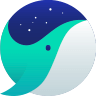
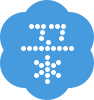

In [25]:
print(datas.decode())